# Analysis of the results of the ST-UNet model based on the log file
Here, I analyze the training and validation loss of the ST-UNet model based on the results stored in the model's log file. I in particular wanted to compare two different versions of the model: one where model.eval() is turned on for the evaluation split (i.e. we evaluate the model in the correct way), or it is turned off (i.e. we evaluate the model in the wrong way - it thinks it is still training). I found that the model is inconsistent when model.eval() is turned on.

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_loss(model, base_path = './networks/STUNet_S1S2256'):
    # Ensure we have a folder to store the results in
    os.makedirs('results', exist_ok = True)
    
    # Log is stored within the 'log.txt' file in the model subfolder
    model_path = os.path.join(base_path, model)
    log_path = os.path.join(model_path, 'log.txt')
    with open(log_path, 'r') as f:
        log_content = f.readlines()
    print(f'Number of lines in log file: {len(log_content)}')
    train_avgs = []
    val_avgs = []
    for line in log_content:
        if 'train loss' in line or 'val loss' in line:
            elements = re.split(r'[\t ]', line)
            idx = elements.index('loss:')
            loss = elements[idx+1]
            try:
                avg = float(loss)
            except:
                print(line)
                avg = None
            if 'train loss' in line:
                train_avgs.append(avg)
            if 'val loss' in line:
                val_avgs.append(avg)

    # Make a plot of the training and validation loss
    plt.plot(train_avgs, label = 'training loss')
    plt.plot(val_avgs, label = 'validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Performance of ST-UNet')
    plt.savefig(f'./results/{model}.png', bbox_inches='tight', transparent=True) # Save as image
    plt.show()

Number of lines in log file: 7095


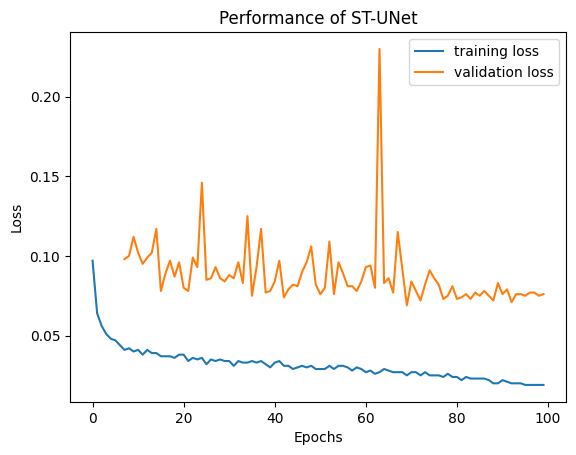

In [3]:
# Model where we can see how inconsistently ST-UNet is on the validation set with model.eval() turned on
model = '2024_04_18-11_24_04_R50-ViT-B_16_lr0.01_bs8_img256_skip3_epo100'
plot_loss(model)

Number of lines in log file: 215


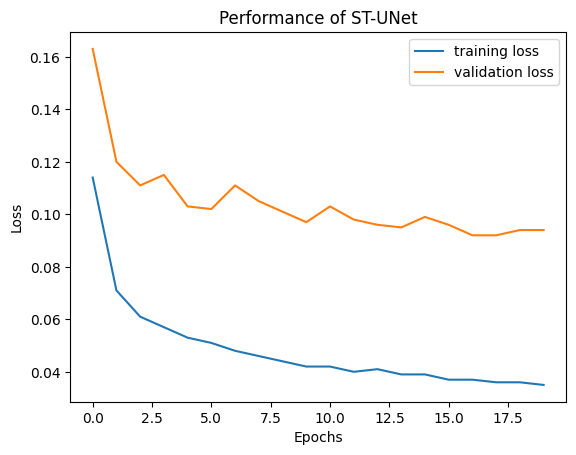

In [4]:
# Model with model.eval() commented out (evaluation is done in training mode)
model = '2024_04_25-15_32_54_R50-ViT-B_16_lr0.001_bs8_img256_skip3_epo20'
plot_loss(model)